In [1]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

c:\users\pavan\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
style.use('ggplot')

In [3]:
df = quandl.get("WIKI/GOOGL")
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [4]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
print(df.head())

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume
Date                                                                
2004-08-19  50.159839  52.191109  48.128568   50.322842   44659000.0
2004-08-20  50.661387  54.708881  50.405597   54.322689   22834300.0
2004-08-23  55.551482  56.915693  54.693835   54.869377   18256100.0
2004-08-24  55.792225  55.972783  51.945350   52.597363   15247300.0
2004-08-25  52.542193  54.167209  52.100830   53.164113    9188600.0


In [5]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

In [6]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [7]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

# we're hoping to predict, is actually the future price. As such, our features are actually: 
# current price, high minus low percent, and the percent 
# change volatility. The price that is the label shall be the price at some determined point the future
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.072956    0.324968   44659000.0
2004-08-20   54.322689  7.921706    7.227007   22834300.0
2004-08-23   54.869377  4.049360   -1.227880   18256100.0
2004-08-24   52.597363  7.657099   -5.726357   15247300.0
2004-08-25   53.164113  3.886792    1.183658    9188600.0


In [8]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df))) #round off to the nearest value 
#We need to forecast the stock price - here we need to forecast out the 1 percent of the valu
#0.01 says next 1day prediction into the future

In [9]:
#The coulumns are our features currently,and adding new column which will predict by shifting to the specified period
df['label'] = df[forecast_col].shift(-forecast_out)

In [10]:
#Regression - Training and Testing
X = np.array(df.drop(['label'], 1)) #All the Features converted to numpy array
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [11]:
df.dropna(inplace=True) #because we are prediction 30 days extra empty values are created in other rows.
#The return here is the training set of features, testing set of features,
#training set of labels, and testing set of labels

In [12]:
y = np.array(df['label']) # all the Lables

In [13]:
# Which classifier to use - "https://scikit-learn.org/stable/tutorial/machine_learning_map/"
#Using Linear Regression
#Since saved in Pickle traing step is skipped
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
# clf = LinearRegression()
# clf.fit(X_train, y_train)
# with open('linearregression.pickle','wb') as f: #Saving after the training the classifier
#     pickle.dump(clf, f)
# confidence = clf.score(X_test, y_test)
# print(confidence)

In [14]:
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)
confidence = clf.score(X_test, y_test)
print(confidence)

NameError: name 'X_test' is not defined

In [15]:
#using svm
# clf = svm.SVR()
# clf.fit(X_train, y_train)
# confidence = clf.score(X_test, y_test)
# print(confidence) 

In [16]:
#Regression - Forecasting and Predicting
forecast_set = clf.predict(X_lately) #selecting only the last few rows to predict
print(forecast_set)
df['Forecast'] = np.nan #Adding new column to store all the values

[ 1183.88326488  1174.92409375  1179.61926467  1178.61908286  1115.69664297
  1060.73558658  1079.34745644  1050.91564326   997.11728851  1037.59981416
  1052.41648724  1053.12902375  1070.56795091  1088.56568091  1093.61688343
  1100.87225794  1110.38115392  1107.16866961  1125.79920725  1141.92026296
  1113.21427878  1100.27785356  1065.03101971  1080.78451199  1092.06374906
  1099.63350741  1112.623491    1127.83861727  1157.78355768  1162.98662561
  1133.44008728  1146.38695206  1147.0416528   1130.27661056  1095.69452439]


In [17]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [18]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i] 
#takes all of the first columns, setting them to NaNs, and then the final column is whatever i
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-02-26,NaN,NaN,NaN,NaN,NaN,1133.440087
2018-02-27,NaN,NaN,NaN,NaN,NaN,1146.386952
2018-02-28,NaN,NaN,NaN,NaN,NaN,1147.041653
2018-03-01,NaN,NaN,NaN,NaN,NaN,1130.276611
2018-03-02,NaN,NaN,NaN,NaN,NaN,1095.694524


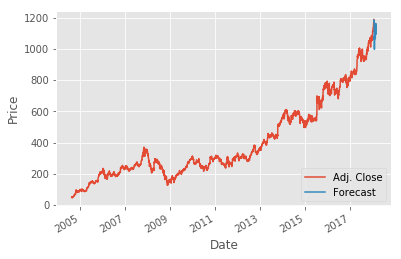

In [19]:
#Visualising the data
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
#Blue is the predicted value